In [2]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 6ms/step - loss: 0.2674 - accuracy: 0.9221
Epoch 2/3
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1113 - accuracy: 0.9647
Epoch 3/3
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0757 - accuracy: 0.9753


In [8]:
# Evaluate the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0883 - accuracy: 0.9731
0.08825906366109848 0.9731000065803528


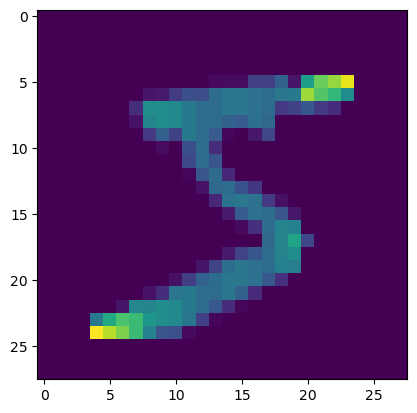

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
plt.show()
print(x_train[0])

In [10]:
# save the model
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [11]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [18]:
predictions = new_model.predict([x_test])
print(predictions)

313/313 [==============================] - 2s 6ms/step
[[1.1232018e-09 1.6714557e-07 2.2944644e-06 ... 9.9998462e-01
  7.9401445e-08 2.3456309e-07]
 [2.6586811e-10 8.3345687e-04 9.9916542e-01 ... 3.6566472e-09
  3.3317992e-08 1.5358924e-12]
 [4.5670660e-08 9.9993134e-01 4.1646440e-06 ... 3.0069084e-05
  9.0348703e-06 7.4712182e-07]
 ...
 [1.8871729e-08 1.2455664e-05 8.0401583e-07 ... 1.6756635e-04
  3.1310665e-05 9.8023016e-04]
 [5.2143978e-06 8.0071186e-06 4.3326173e-07 ... 1.8261538e-06
  3.3359530e-03 5.5051669e-07]
 [1.5092505e-07 4.0785881e-07 1.2685556e-06 ... 2.0996423e-10
  3.4321712e-07 4.1996970e-09]]


In [15]:
import numpy as np

print(np.argmax(predictions[0]))

7


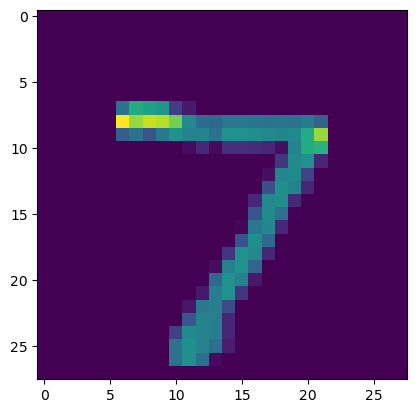

In [16]:
plt.imshow(x_test[0])
plt.show()